In [1]:
from scipy.spatial.distance import cdist
from scipy.integrate import odeint
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [81]:
# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*100)

In [82]:
time_points.shape

(10000,)

In [83]:
# define the lorenz system
# x, y, and z make up the system state, t is time, and sigma, rho, beta are the system parameters
def lorenz_system(current_state, t):
    
    # positions of x, y, z in space at the current time point
    x, y, z = current_state
    
    # define the 3 ordinary differential equations known as the lorenz equations
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    # return a list of the equations that describe the system
    return [dx_dt, dy_dt, dz_dt]

In [84]:
# use odeint() to solve a system of ordinary differential equations
# the arguments are: 
# 1, a function - computes the derivatives
# 2, a vector of initial system conditions (aka x, y, z positions in space)
# 3, a sequence of time points to solve for
# returns an array of x, y, and z value arrays for each time point, with the initial values in the first row

In [85]:
xyz_nominal = odeint(lorenz_system, initial_state, time_points)
xyz_nominal.shape

(10000, 3)

In [106]:
time_to_transition=[]
all_D=[]
for t in range(0,xyz_nominal.shape[0],100):
    L=[]
    for i in range(20):
        noisy_init_state = xyz_nominal[t,0]+np.random.normal(scale=0.0001,size=3)
        xyz = odeint(lorenz_system, noisy_init_state, time_points)
        L.append(xyz)

    M=stack(L)

    D=[]
    for i in range(M.shape[1]):
        _slice=M[:,i,:]
        _max=max(cdist(_slice,_slice).flatten())
        D.append(_max)
    D=array(D)
    all_D.append(D)
    time_to_transition.append(nonzero(D>1)[0][0])
    #if t % 10 ==9:
    print(t,end='\r')

In [107]:
len(time_to_transition)

100

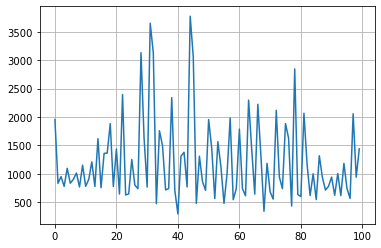

In [108]:
plot(time_to_transition)
grid()

In [109]:
len(all_D)

100

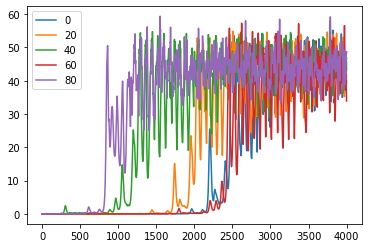

In [110]:
for i in range(0,100,20):
    plot(all_D[i][:4000],label=str(i))
legend()

### summary for now

The time to transition to the large-distance state varies depending on the starting point. However the dependence is not simple.

Next thing I would like to try is adding noise in a particular direction.

The two directions that define the tangent to the "single wing" manifold seem to be: The delocity vector, and the vector orthogonal to the velocity vector that is tangent to the manifold.